# Exercise 3

Fernando Freire & Helena Liz
_______________________________________________________________________________________________________________
## Scale-free networks and networks attacks

In [3]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import math as math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import colors
%matplotlib inline
import numpy as np

## Scale-free networks.

Generate a scale-free network with $10000$ edges and add $10$ nodes in each
step (use the method *barabasi_albert_ graph(n, m)*). 

Calculate the values of $L$, $C$ and the degree distribution of the nodes. 

Generate a random network that has the same number of nodes and branches as the network that you have created.

Calculate your values of $L$, $C$ and the degree distribution of the nodes and compare the values
obtained.

### L & C

In [31]:
def get_graph_metrics1(graph):
    """
    Obtain: 
        - The clustering index (C)
        - Average shortest path length (L)
        - Order of the largest connected component (O)
    """
    largest_cc = max(nx.connected_components(graph), key=len)   
    largest_connected_subgraph = graph.subgraph(largest_cc)
    if not nx.is_connected(graph): 
        subgraph = largest_connected_subgraph
    else:
        subgraph = graph
    return nx.average_clustering(graph),\
           nx.average_shortest_path_length(subgraph),\
           largest_connected_subgraph.order()
    
def l_c_random(n_graph, n, p):
    """
    Obtain the same parameters than the previous one for different random graphs
    """
    acum_c = 0
    acum_l = 0
    acum_o = 0
    for i in range(0, n_graph):
        graph = nx.gnp_random_graph(n, p)
        c, l, o = get_graph_metrics(graph)
        acum_c += c
        acum_l += l
        acum_o += o
    return [acum_c/n_graph, acum_l/n_graph, acum_o/n_graph]

def graph_metric(metric, graph):
    """
    Promediate a node metric to all the nodes of the graph
    """
    method = getattr(nx, metric)
    return sum(method(graph).values())/graph.order()

def max_kcore_k(graph):
    """
    maximal subgraph that contains nodes of degree k or more
    """
    core_number = nx.core_number(graph)
    max_kcore = 0
    for node in core_number:
        if core_number[node] > max_kcore:
            max_kcore = core_number[node]
    return max_kcore  

def get_graph_metrics2(graph):
    """
    Obtain: 
        - Degree centrality
        - Closeness centrality
        - Betweenness centrality
        - Graph clique number
        - Average clustering
        - Max k-core k',
        - Average shortest path length'
    """
    largest_cc = max(nx.connected_components(graph), key=len)   
    largest_connected_subgraph = graph.subgraph(largest_cc)
    return [graph_metric("degree_centrality", graph),
           graph_metric("closeness_centrality", graph),
           graph_metric("betweenness_centrality", graph), 
           nx.graph_clique_number(graph),
           nx.average_clustering(graph),
           max_kcore_k(graph),
           nx.average_shortest_path_length(largest_connected_subgraph)]

In [7]:
order = 10000
edges = 10
graph_free_scale_barabasi = nx.barabasi_albert_graph(order, edges)
c, l, o = get_graph_metrics1(graph_free_scale_barabasi)

In [155]:
print("The clustering index (C) is: ", c)
print("Average shortest path length (L) is: ", l)
print("Order of the largest connected component (O): ", o)

# Result : 0.011121720734477772 3.0628272427242726 10000

The clustering index (C) is:  0.01135564000874577
Average shortest path length (L) is:  3.0595018501850184
Order of the largest connected component (O):  10000


In [14]:
print("Free scale graph size:", graph_free_scale_barabasi.size())
graph_random = nx.gnm_random_graph(order, graph_free_scale_barabasi.size())
c_random, l_random, o_random = get_graph_metrics1(graph_random)

d = {'Free Scale': [c, l], 'Random': [c_random, l_random]}
df = pd.DataFrame(data=d, index = ['Average clustering',
                                   'Average shortest path length'])
df

Free scale graph size: 99900


,Free Scale,Random
Average clustering,0.011356,0.002025
Average shortest path length,3.059502,3.403183


### Node degree distribution


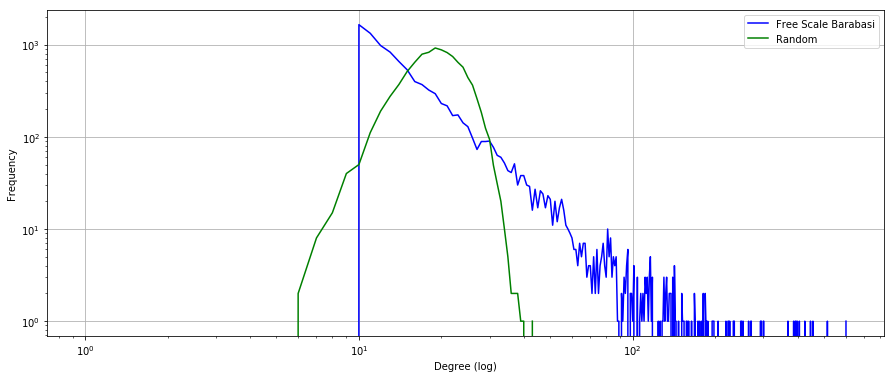

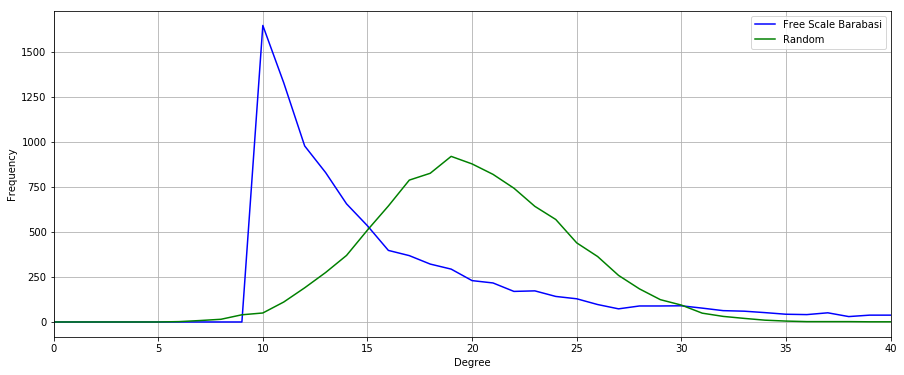

In [15]:
plt.figure(figsize=(15, 6))
plt.xlabel('Degree (log)')
plt.ylabel('Frequency')

his = nx.degree_histogram(graph_free_scale_barabasi)
plt.plot(his, color="blue")
his_al = nx.degree_histogram(graph_random)
plt.grid()
plt.plot(his_al, color='green')
plt.xscale("log", nonposx='clip')
plt.yscale("log", nonposy='clip')
legend_handles = [ mlines.Line2D([], [], color='blue', \
                          markersize=15, label='Free Scale Barabasi'), \
                mlines.Line2D([], [], color='green', \
                          markersize=15, label='Random')]
plt.legend(handles=legend_handles, loc = 1);

plt.figure(figsize=(15, 6))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xlim(0, 40)
his = nx.degree_histogram(graph_free_scale_barabasi)
plt.plot(his, color="blue")
his_al = nx.degree_histogram(graph_random)
plt.grid()
plt.plot(his_al, color='green')
#plt.xscale("log", nonposx='clip')
#plt.yscale("log", nonposy='clip')
legend_handles = [ mlines.Line2D([], [], color='blue', \
                          markersize=15, label='Free Scale Barabasi'), \
                mlines.Line2D([], [], color='green', \
                          markersize=15, label='Random')]
plt.legend(handles=legend_handles, loc = 1);

### Results Comparison

It's very apparent the graph of free scale distribution with the linear decreasing region. 

The random network present the expected poisson shape.

L from free scale is similar to random network and C much larger than random network, as expected

## Network Attack.

### Random attack

Implement a routine program random_attack $(G, m)$ in Python that perform a random attack on $m$ nodes of graph $G$.

Use the previous routine to calculate the size of the largest connected component in random, small world and scale-free graphs of $1000$ nodes and $4000$ branches after attacks of 10%, 30%, 50%, 70% and 90% of the nodes of the graph.

#### Methods

In [141]:
import random
def random_attack(graph, m, verbose=False):
    """
    remove nodes of a graph
    """
    for remove in range(0,m):
        node = random.choice(list(graph.nodes))
        if verbose: print("Removing node %s with degree %s" % (node, graph.degree(node)))
        graph.remove_node(node)

    return graph

def random_attack_percent(graph, percent_nodes_attacked, verbose=False):
    """
    calculate the number of nodes that we have to remove and remove them
    """
    m = graph.order() * percent_nodes_attacked / 100
    return random_attack(graph, round(m), verbose)

def node_attack_not_reuse(initial_graph, percents_nodes_attacked):
    """
    Attack initial_graph by removing list of percents_nodes_attacked from the beginning
    The initial graph is preserved
    
    Returns:
        list of int: sizes of max connected subgraph for each percent
    """
    sizes_max_connected_subgraph = []
    for percent_nodes_attacked in percents_nodes_attacked:
        #print("Attacking %s nodes" % (percent_nodes_attacked))
        graph = initial_graph.copy()
        if percent_nodes_attacked == 0:
            attacked_graph = graph
        else:
            attacked_graph = random_attack_percent(graph, percent_nodes_attacked)
        largest_cc = max(nx.connected_components(attacked_graph), key=len) 
        largest_connected_subgraph = attacked_graph.subgraph(largest_cc)
        sizes_max_connected_subgraph.append(largest_connected_subgraph.size())
    return sizes_max_connected_subgraph

def node_attack(graph, percents_nodes_attacked, attack_method_name='random_attack_percent'):
    """
    Attack initial_graph by removing list of percents_nodes_attacked taken into account the nodes
    previously removed.
    The initial graph is modified.
    
    Returns:
        list of int: sizes of max connected subgraph for each percent
    """
    sizes_max_connected_subgraph = []
    percent_prev = 0
    for percent_nodes_attacked in percents_nodes_attacked:
        #print("Attacking %s nodes" % (percent_nodes_attacked))
        percent_current = percent_nodes_attacked - percent_prev
        percent_prev = percent_nodes_attacked
        if percent_current == 0:
            attacked_graph = graph
        else:
            attacked_graph = globals()[attack_method_name](graph, percent_current)
        largest_cc = max(nx.connected_components(attacked_graph), key=len) 
        largest_connected_subgraph = attacked_graph.subgraph(largest_cc)
        sizes_max_connected_subgraph.append(largest_connected_subgraph.size())
        graph = attacked_graph
    return sizes_max_connected_subgraph

def do_attacks(percents_nodes_attacked, nodes, edges,
               attack_method_name='random_attack_percent', seed=0):
    """
    Apply the function attack_method_name for different types of graph
    """
    random.seed = seed
    n = nodes
    e = edges
    # Create the different graphs: random, small world and scale free
    graph_random = nx.gnm_random_graph(n, e)
    k = int(e*2/n)
    p = 0.5
    graph_small_world = nx.watts_strogatz_graph(n, k, p)
    k = int(e/n)
    graph_scale_free = nx.barabasi_albert_graph(n, k)

    random_size = node_attack(graph_random.copy(), percents_nodes_attacked)
    small_world_size = node_attack(graph_small_world.copy(), percents_nodes_attacked)
    free_scale_size = node_attack(graph_scale_free.copy(), percents_nodes_attacked)

    d = {'Random': random_size, 'Small-World': small_world_size, 'Scale-Free': free_scale_size}
    df = pd.DataFrame(data=d, index = [str(i)+'%' for i in percents_nodes_attacked])
    display(df)
    
    return graph_random, graph_small_world, graph_scale_free, df

def plot_networks(metrics_df, attack_df, percents_nodes_attacked):
    """
    Plot networks data
    """
    x = ['Random', "Small World", "Scale Free"]
    data = metrics_df.values.tolist()

    degree_centrality = data[0]
    closeness_centrality = data[1]
    betweenness_centrality = data[2]
    graph_clique_number = data[3]
    average_clustering = data[4]
    max_kcore = data[5]
    average_shortest_path_length = data[6]

    # Last plot
    random_plot = attack_df["Random"]
    small_world_plot = attack_df["Small-World"]
    scale_free_plot = attack_df['Scale-Free']


    fig, axs = plt.subplots(2, 4, figsize=(20, 12))
    axs[0, 0].bar(x, degree_centrality, color = ["m", "c", "b"])
    axs[0, 0].set(title='degree_centrality')

    axs[0, 1].bar(x, closeness_centrality, color = ["m", "c", "b"])
    axs[0, 1].set(title='closeness_centrality')

    axs[0, 2].bar(x, betweenness_centrality, color = ["m", "c", "b"])
    axs[0, 2].set(title='betweenness_centrality')

    axs[0, 3].bar(x, graph_clique_number, color = ["m", "c", "b"])
    axs[0, 3].set(title='graph_clique_number')

    axs[1, 0].bar(x, average_clustering, color = ["m", "c", "b"])
    axs[1, 0].set(title='average_clustering')

    axs[1, 1].bar(x, max_kcore, color = ["m", "c", "b"])
    axs[1, 1].set(title='max_kcore')

    axs[1, 2].bar(x, average_shortest_path_length, color = ["m", "c", "b"])
    axs[1, 2].set(title='average_shortest_path_length')

    axs[1, 3].plot(percents_nodes_attacked, random_plot, label= "Random", color = "m")
    axs[1, 3].plot(percents_nodes_attacked, small_world_plot, label= "Small World", color = "c")
    axs[1, 3].plot(percents_nodes_attacked, scale_free_plot, label= "Scale Free", color = "b")
    plt.grid()
    plt.show()
    
def plot_attack(attack_df, percents_nodes_attacked, title, x0=0, x1=100, y0=0, y1=4000):
    """
    Plot shrink of largest connected component
    """
    # Plot results
    random_plot = attack_df["Random"]
    small_world_plot = attack_df["Small-World"]
    scale_free_plot = attack_df['Scale-Free']

    plt.figure(figsize=(15, 10))
    plt.plot(percents_nodes_attacked, random_plot, label='random', color = "m")
    plt.plot(percents_nodes_attacked, small_world_plot, label='small world', color = "c")
    plt.plot(percents_nodes_attacked, scale_free_plot, label='scale free', color = "b")

    plt.xlabel('Percent of attacked nodes(%)')
    plt.ylabel('Size of largest connected component')
    plt.xlim(x0,x1)
    plt.ylim(y0,y1)
    plt.title(title)
    plt.grid()
    plt.legend()

    plt.show()
    
def plot_attack_combined(attack_random_df, attack_degree_df, percents_nodes_attacked, title, x0=0, x1=100, y0=0, y1=4000):
    """
    Plot shrink of largest connected component
    """
    # Plot results
    random_plot_r = attack_random_df["Random"]
    small_world_plot_r = attack_random_df["Small-World"]
    scale_free_plot_r = attack_random_df['Scale-Free']
    
    random_plot_d = attack_degree_df["Random"]
    small_world_plot_d = attack_degree_df["Small-World"]
    scale_free_plot_d = attack_degree_df['Scale-Free']

    plt.figure(figsize=(15, 10))
    plt.plot(percents_nodes_attacked, random_plot_r, marker="o", label='Random (random attack)')
    plt.plot(percents_nodes_attacked, small_world_plot_r, marker="o", label='Small World (random attack)')
    plt.plot(percents_nodes_attacked, scale_free_plot_r, marker="o", label='Scale Free (random attack)')
    plt.plot(percents_nodes_attacked, random_plot_d, marker="x", label='Random (degree attack)')
    plt.plot(percents_nodes_attacked, small_world_plot_d, marker="x", label='Small World (degree attack)')
    plt.plot(percents_nodes_attacked, scale_free_plot_d, marker="x", label='Scale Free (degree attack)')

    plt.xlabel('Percent of attacked nodes(%)')
    plt.ylabel('Size of largest connected component')
    plt.xlim(x0,x1)
    plt.ylim(y0,y1)
    plt.title(title)
    plt.grid()
    plt.legend()

    plt.show()

#### Verification

We verify the algorithm over a random graph:

Removing node 48 with degree 2
Removing node 12 with degree 7
Removing node 51 with degree 4
Removing node 0 with degree 5
Removing node 85 with degree 2
Removing node 76 with degree 3
Removing node 41 with degree 3
Removing node 3 with degree 1
Removing node 35 with degree 6
Removing node 52 with degree 1
Removing node 8 with degree 3
Removing node 10 with degree 6
Removing node 66 with degree 3
Removing node 61 with degree 4
Removing node 88 with degree 2
Removing node 72 with degree 6
Removing node 32 with degree 4
Removing node 5 with degree 4
Removing node 90 with degree 4
Removing node 38 with degree 2
Removing node 44 with degree 2
Removing node 1 with degree 4
Removing node 77 with degree 7
Removing node 62 with degree 3
Removing node 91 with degree 5
Removing node 56 with degree 1
Removing node 47 with degree 4
Removing node 28 with degree 2
Removing node 17 with degree 5
Removing node 69 with degree 4
Removing node 53 with degree 5
Removing node 82 with degree 2
Removing node

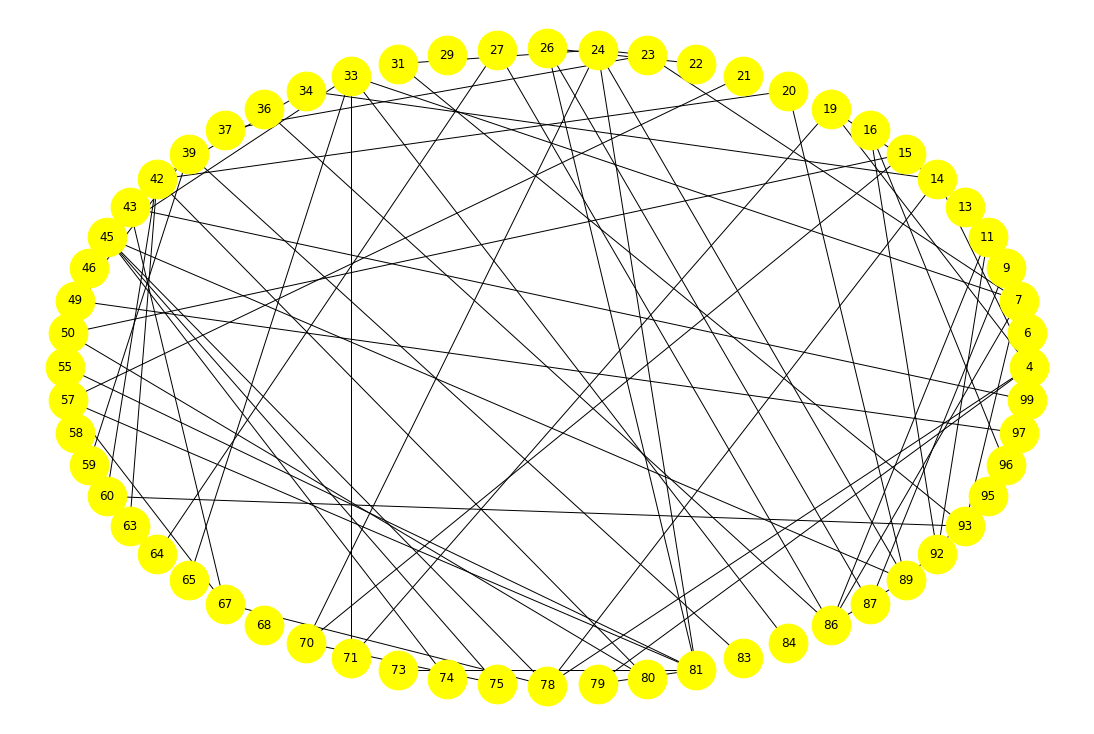

In [107]:
n = 100
e = 200
random.seed = 0
percent_nodes_attacked = 40
graph = nx.gnm_random_graph(n, e , seed = 0)
graph_attacked = random_attack_percent(graph, percent_nodes_attacked, verbose=True)
plt.figure(figsize=(15, 10))
nx.draw_circular(graph_attacked, with_labels = True, node_color = "yellow", node_size = 1500)

assert graph.order() == n - percent_nodes_attacked, "Graph order incorrect diven the number of removed nodes"

#### Calculate sizes of the largest connected component

In [108]:
# Print the result of previous function in a table
percents_nodes_attacked = [0, 10, 30, 40, 50, 60, 70, 80, 90]
nodes = 1000
edges = 4000
graph_random, graph_small_world, graph_scale_free, attack_df_random =\
    do_attacks(percents_nodes_attacked, nodes, edges, 
               attack_method_name='random_attack_percent', seed=1)

,Random,Small-World,Scale-Free
0%,4000,4000,3984
10%,3255,3228,3290
30%,2119,2077,2040
40%,1718,1668,1637
50%,1395,1360,1318
60%,1126,1086,1094
70%,911,887,906
80%,735,710,740
90%,587,579,572


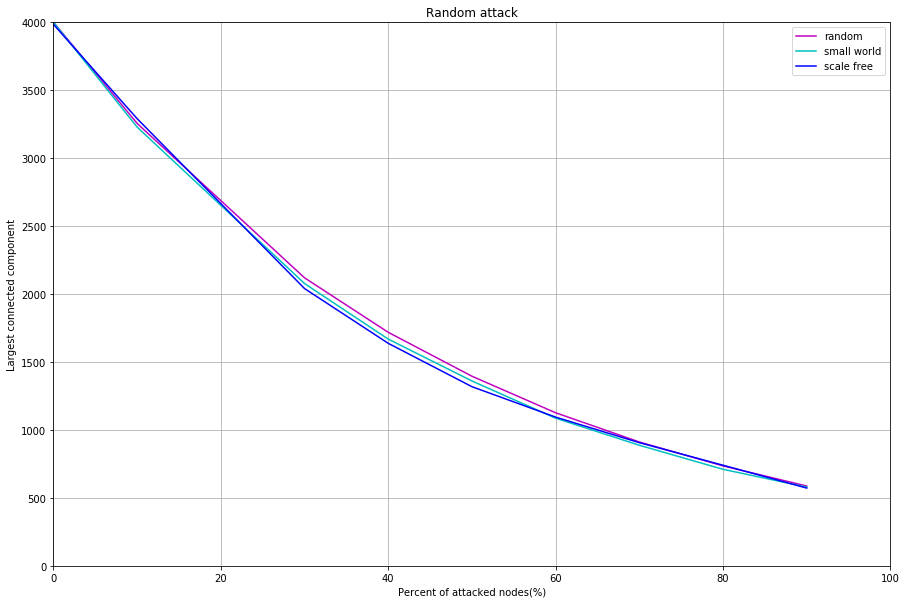

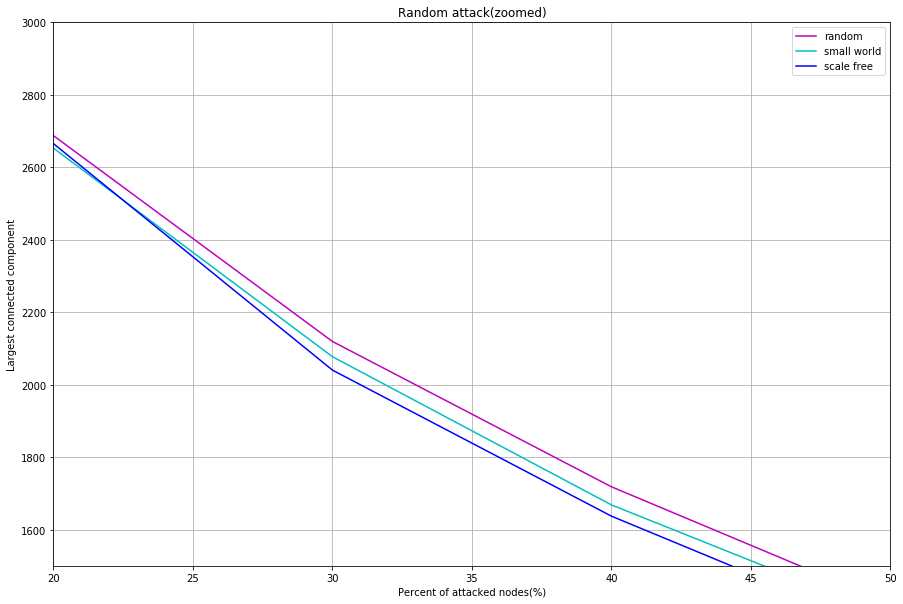

In [122]:
plot_attack(attack_df_random, percents_nodes_attacked, "Random attack")
plot_attack(attack_df_random, percents_nodes_attacked, "Random attack(zoomed)", 20, 50, 1500, 3000)

#### Graphs metrics
We calculate the metrics of all the graphs involved in order to verify that are the type of graphs expected and there are not errors.

In [34]:
# Print the output of function "get_graph_metrics2"
d = {'Random': get_graph_metrics2(graph_random), 
     'Small-World': get_graph_metrics2(graph_small_world),
     'Scale-Free': get_graph_metrics2(graph_scale_free)}
df = pd.DataFrame(data=d, index = ['Degree centrality', 'Closeness centrality',
                                  'Betweenness centrality', 'Graph clique number',
                                  'Average clustering', 'Max k-core k',
                                  'Average shortest path length'])
display(df)

,Random,Small-World,Scale-Free
Degree centrality,0.008008,0.008008,0.007976
Closeness centrality,0.282098,0.271667,0.314885
Betweenness centrality,0.002562,0.002691,0.002202
Graph clique number,3.000000,4.000000,4.000000
Average clustering,0.007779,0.081711,0.033892
Max k-core k,5.000000,5.000000,4.000000
Average shortest path length,3.557001,3.685457,3.197996


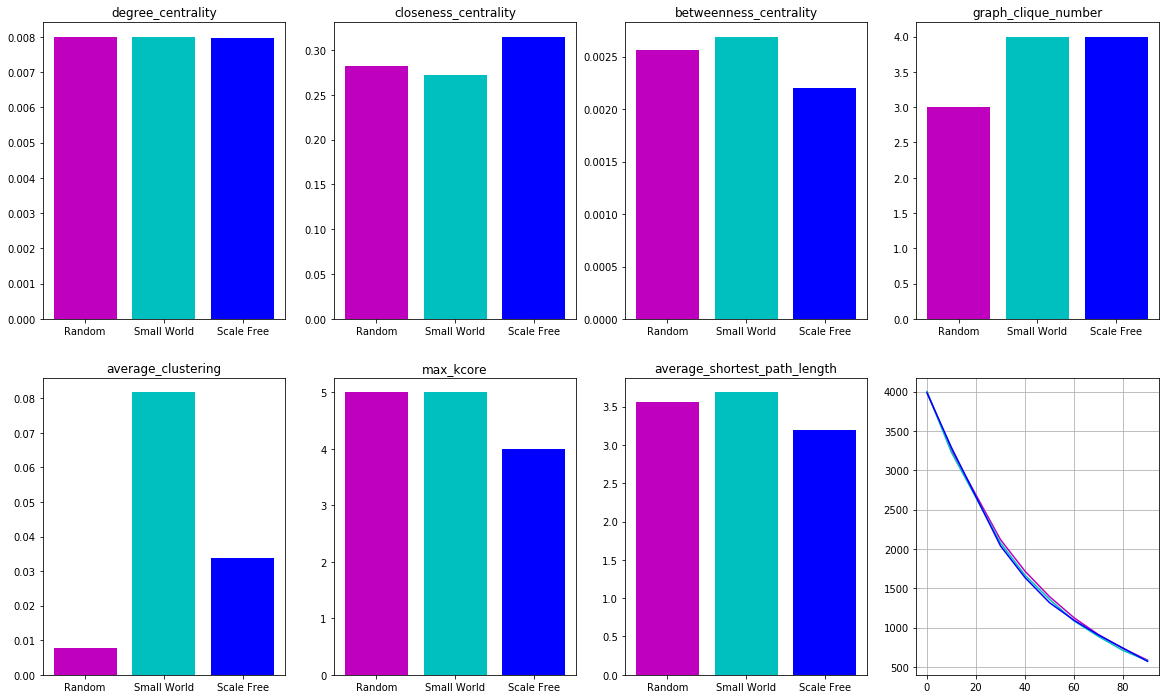

In [125]:
plot_networks(df, attack_df_random, percents_nodes_attacked)

### Degree attack

Implement a method *degree_attack(G, m)* in Python that performs an attack based on degrees to $m$ nodes of graph $G$.

Use the previous routine to calculate the size of the largest connected component in random, small world and scale-free graphs of $1000$ nodes and $4000$ branches after attacks of 10%, 30%, 50%, 70% and 90% of the nodes.

#### Methods

In [81]:
def degree_attack(graph, m, verbose=False):
    """
    Removes 'm' nodes in 'graph' in degree descending order
    """
    degree_dist_sorted = sorted([(b,a) for (a,b) in graph.degree()])
    pos = -1
    for remove in range(0,m):
        (degree, node) = degree_dist_sorted[pos]
        print("Removing node %s with degree %s" % (node, degree))
        graph.remove_node(node)
        pos -= 1

    return graph

def degree_attack_percent(graph, percent_nodes_attacked, verbose=False):
    """
    Removes 'percent_nodes_attacked' in 'graph'
    """
    m = graph.order() * percent_nodes_attacked / 100
    return degree_attack(graph, round(m), verbose)

#### Verification

We verify the algorithm over a random graph: the nodes are removed by their degree, first the ones with the highest degree.

Removing node 29 with degree 8
Removing node 17 with degree 8
Removing node 25 with degree 7
Removing node 10 with degree 7
Removing node 26 with degree 6
Removing node 9 with degree 6
Removing node 28 with degree 5
Removing node 27 with degree 5
Removing node 19 with degree 5
Removing node 15 with degree 5
Removing node 2 with degree 5
Removing node 22 with degree 4
Removing node 18 with degree 4
Removing node 12 with degree 4
Removing node 6 with degree 4
Removing node 4 with degree 4
Removing node 3 with degree 4
Removing node 16 with degree 3


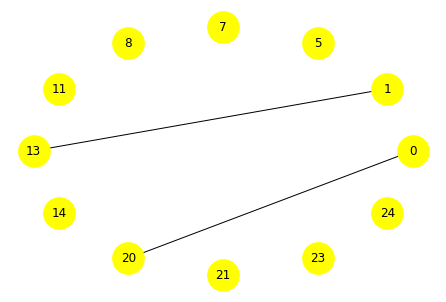

In [82]:
n = 30
e = 60
random.seed = 0
percent_nodes_attacked = 60
graph = nx.gnm_random_graph(n, e , seed = 0)
graph_attacked = degree_attack_percent(graph, percent_nodes_attacked, verbose=True)
nx.draw_circular(graph_attacked, with_labels = True, node_color = "yellow", node_size = 1000)

#### Calculate sizes of the largest connected component

In [112]:
percents_nodes_attacked = [0, 10, 30, 40, 50, 60, 70, 80, 90]
nodes = 1000
edges = 4000
graph_random, graph_small_world, graph_scale_free, attack_degree_df =\
    do_attacks(percents_nodes_attacked, nodes, edges, 
               attack_method_name='degree_attack_percent', seed=0)

,Random,Small-World,Scale-Free
0%,4000,4000,3984
10%,3218,3256,3341
30%,2025,2081,2108
40%,1643,1704,1738
50%,1357,1381,1410
60%,1088,1118,1109
70%,882,898,881
80%,728,736,725
90%,589,602,614


##### Plot

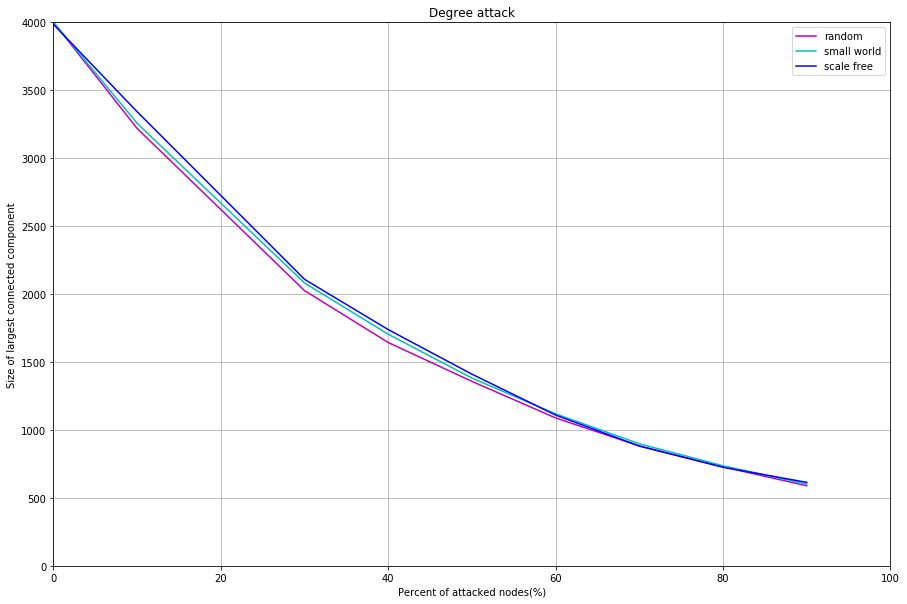

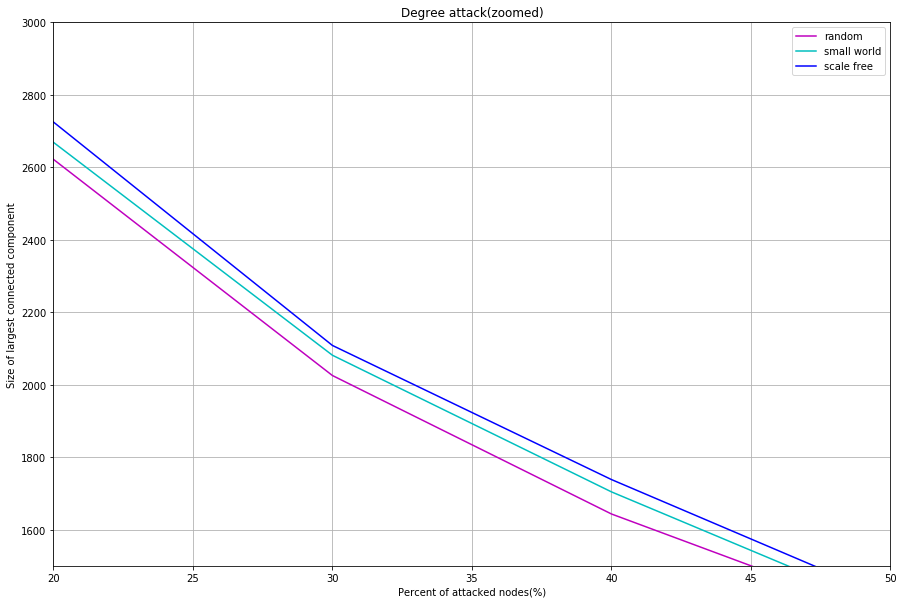

In [126]:
plot_attack(attack_degree_df, percents_nodes_attacked, "Degree attack")
plot_attack(attack_degree_df, percents_nodes_attacked, "Degree attack(zoomed)", 20, 50, 1500, 3000)

#### Graphs metrics
We calculate the metrics of all the graphs involved in order to verify that are the type of graphs expected and there are not errors.

In [111]:
# Print the output of function "get_graph_metrics2"
d = {'Random': get_graph_metrics2(graph_random), 
     'Small-World': get_graph_metrics2(graph_small_world),
     'Scale-Free': get_graph_metrics2(graph_scale_free)}
df2 = pd.DataFrame(data=d, index = ['Degree centrality', 'Closeness centrality',
                                  'Betweenness centrality', 'Graph clique number',
                                  'Average clustering', 'Max k-core k',
                                  'Average shortest path length'])
display(df2)

,Random,Small-World,Scale-Free
Degree centrality,0.008008,0.008008,0.007976
Closeness centrality,0.281790,0.271109,0.313377
Betweenness centrality,0.002565,0.002698,0.002217
Graph clique number,3.000000,4.000000,4.000000
Average clustering,0.006862,0.080819,0.029119
Max k-core k,5.000000,6.000000,4.000000
Average shortest path length,3.559570,3.692402,3.212326


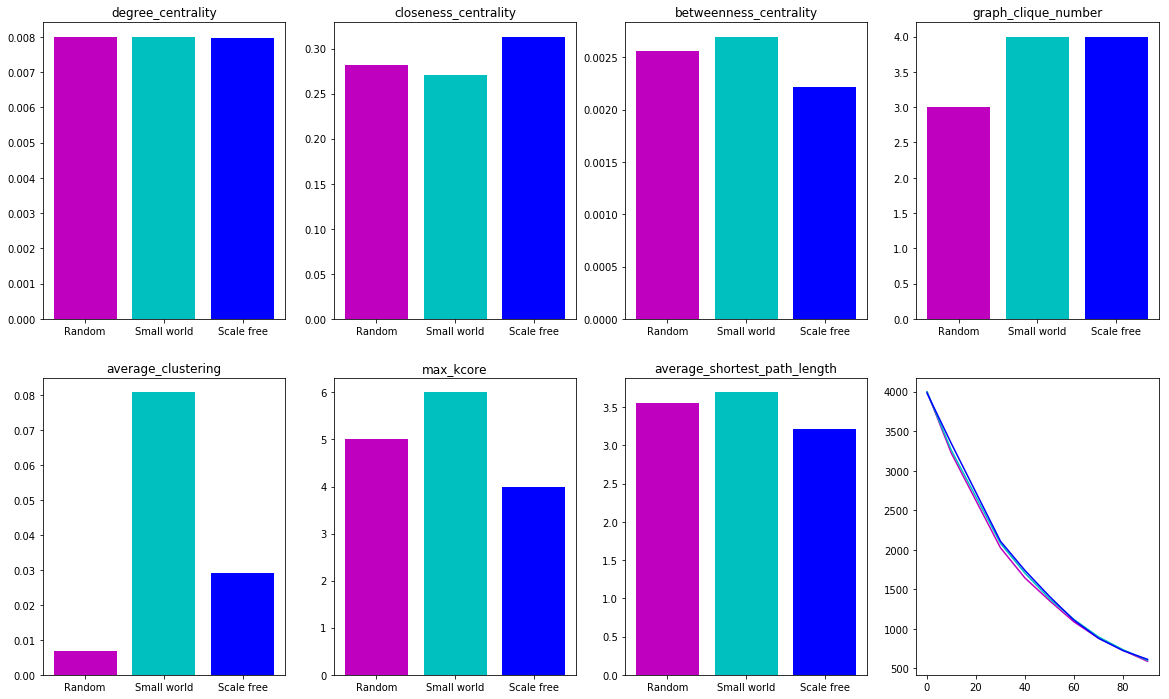

In [114]:
plot_networks(df2, attack_degree_df, percents_nodes_attacked)

### Comparisons
Compare the result obtained in the two previous sections.

First, we verified that the parameters $C$ and $L$ for are adequate for small-world region of *watts_strogatz_graph*. To do so we print the metrics of initial graphs attacked.

In  both attacks scale-free are more resilient, with a connected component of larger size, but only after 30% of nodes removed.

The degree attack is much efficient but only to 30% of nodes removed, for the three types of graphs. This is due to the high degree of the first nodes removed. After the remaining nodes have less degree and are not crucial to the attack. Or, in other words, the degree attack became a random attack. 


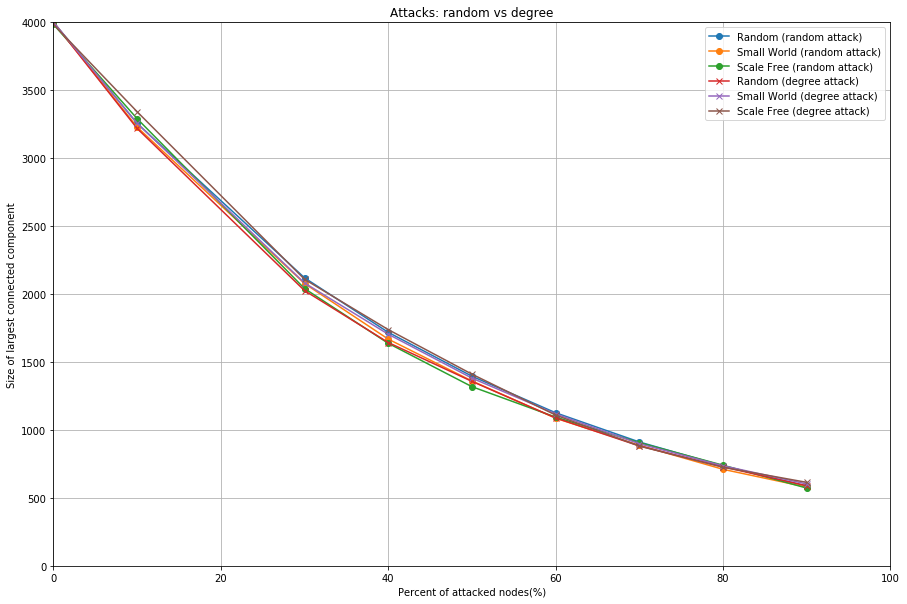

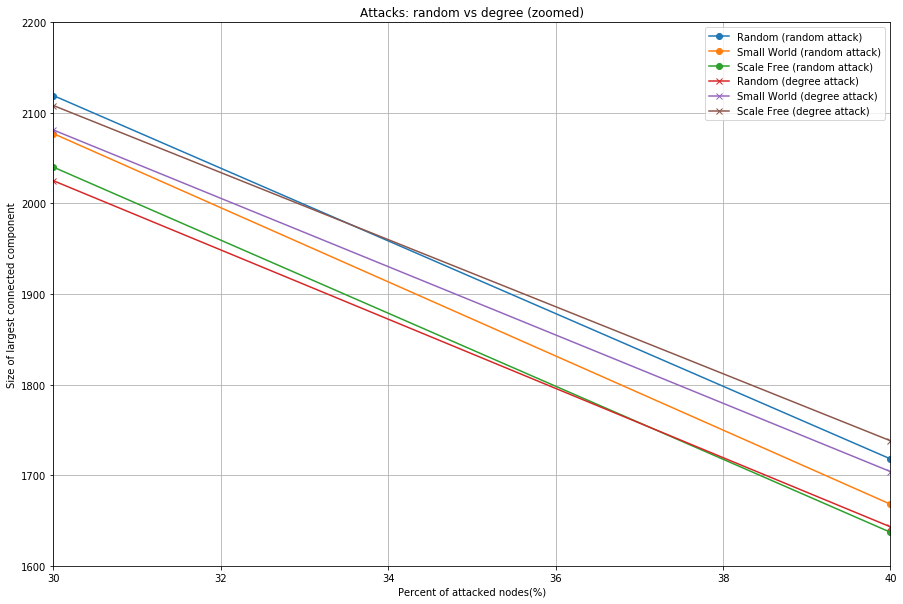

In [143]:
plot_attack_combined(attack_df_random, attack_degree_df, percents_nodes_attacked, "Attacks: random vs degree")
plot_attack_combined(attack_df_random, attack_degree_df, percents_nodes_attacked, "Attacks: random vs degree (zoomed)", 
                     x0=30, x1=40, y0=1600, y1=2200)